In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#The Credit Card Fraud Dataset has:

Time → seconds elapsed between this transaction and the first transaction.

V1–V28 → features created by PCA (Principal Component Analysis) to protect sensitive cardholder data. Their original meaning isn’t shared (anonymized).

Amount → transaction amount.

Class → fraud indicator (0 = Non-fraud, 1 = Fraud)

In [9]:
# load the dataset into a DataFrame called df
df = pd.read_csv("../data/creditcard.csv")
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()
df['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64

# Plot fraud vs non-fraud counts


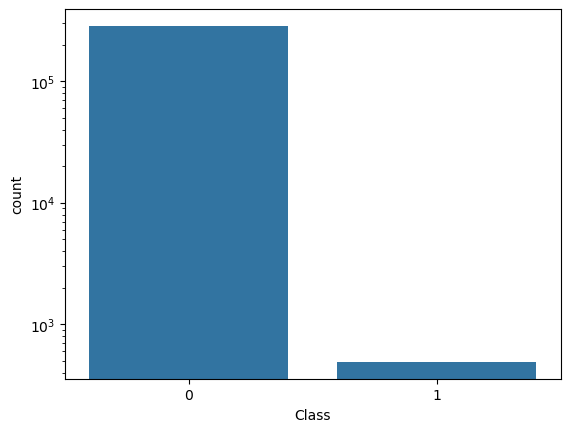

In [12]:
# plot fraud vs non-fraud counts
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.show()

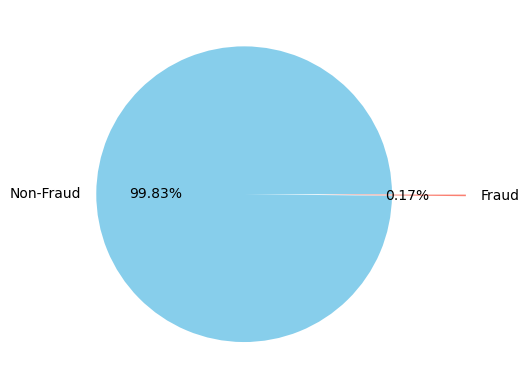

In [13]:
fig2=df['Class'].value_counts().plot.pie(autopct='%1.2f%%',
    labels=["Non-Fraud","Fraud"],
    colors=['skyblue','salmon'],
    explode=[0,0.5]
    )

plt.ylabel("")
plt.show()
        

# Distribution of transaction amounts


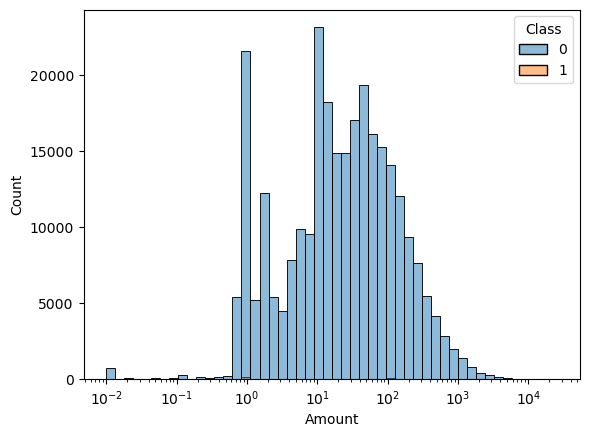

In [15]:
# TODO: plot histogram of Amount colored by Class
sns.histplot(x='Amount', data=df, hue='Class', bins=50, log_scale=True)
plt.show()

# Correlation heatmap


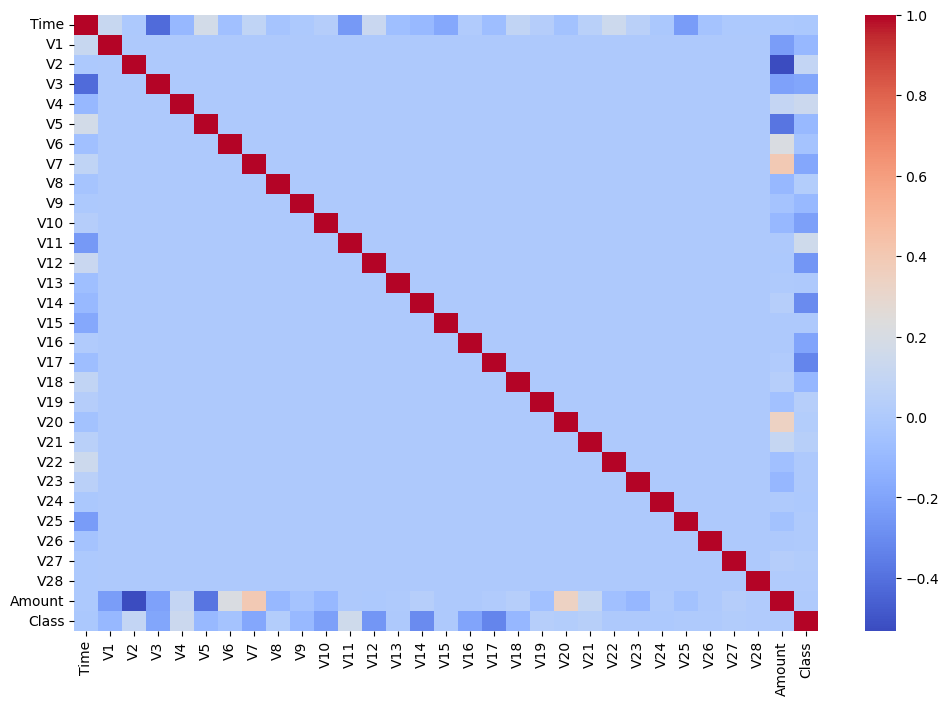

In [17]:
# TODO: correlation heatmap
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

# Day2-understanding relationship between amount and class

In [20]:
class_amount=df.groupby('Class')['Amount'].mean()
print(class_amount)


Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64


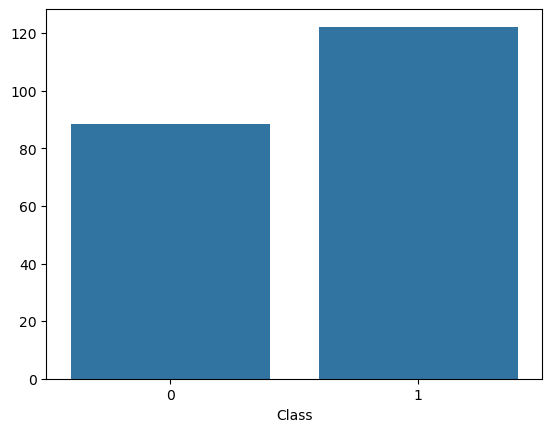

In [21]:
sns.barplot(x=class_amount.index,y=class_amount.values)
plt.show()

#non fraud transactions are all below 100 with mean value= 88.29 and fraudulent transactions are of higher values with mean= 122.21

In [23]:
df_sorted=df.sort_values(['Class','Amount'],ascending=[True,False]).copy()
print(df_sorted)

            Time         V1         V2         V3         V4          V5  \
274771  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   
58465    48401.0 -36.802320 -63.344698 -20.645794  16.715537  -20.672064   
151296   95286.0 -34.549296 -60.464618 -21.340854  16.875344  -19.229075   
46841    42951.0 -23.712839 -42.172688 -13.320825   9.925019  -13.945538   
54018    46253.0 -21.780665 -38.305310 -12.122469   9.752791  -12.880794   
...          ...        ...        ...        ...        ...         ...   
234574  148028.0  -1.053840   4.362801  -6.023534   5.304534    1.480738   
234705  148074.0  -2.219219   0.727831  -5.458230   5.924850    3.932464   
237107  149096.0   1.184891   3.152084  -6.134780   5.531252    1.733867   
248296  153875.0  -0.613696   3.698772  -5.534941   5.620486    1.649263   
274382  165981.0  -5.766879  -8.402154   0.056543   6.950983    9.880564   

               V6          V7         V8        V9  ...        V21        V22  \
274771

In [24]:
df_sorted['row_number']=df_sorted.groupby('Class').cumcount()+1
#print(df_sorted[['Class','Amount','row_number']])
req_data=df_sorted[['Class','Amount','row_number']]
print(req_data[req_data['row_number']<=20])

        Class    Amount  row_number
274771      0  25691.16           1
58465       0  19656.53           2
151296      0  18910.00           3
46841       0  12910.93           4
54018       0  11898.09           5
169457      0  11789.84           6
284249      0  10199.44           7
227921      0  10000.00           8
74699       0   8790.26           9
245474      0   8787.00          10
226690      0   8360.00          11
228158      0   8182.70          12
19760       0   7879.42          13
240739      0   7862.39          14
188560      0   7766.60          15
1632        0   7712.43          16
57209       0   7636.30          17
201638      0   7583.32          18
218985      0   7541.70          19
23128       0   7429.15          20
176049      1   2125.87           1
6971        1   1809.68           2
249167      1   1504.93           3
89190       1   1402.16           4
81609       1   1389.56           5
95597       1   1354.25           6
199896      1   1335.00     

# amount is not the only parameter to judge fraudulent transactions are their are many fraudulent transactions with amount 0

In [26]:
# top 10 non fraud transactions, Class=0

top10_nonfraud=req_data[(req_data['Class']==0) & (req_data['row_number']<=10)]

# top 10 fraud transactions, Class=1

top10_fraud=req_data[(req_data['Class']==1) & (req_data['row_number']<=10)]

print("Top 10 non fraud transactions")
print(top10_nonfraud[['row_number','Class','Amount']])

print("Top 10 fraud transactions")
print(top10_fraud[['row_number','Class','Amount']])


Top 10 non fraud transactions
        row_number  Class    Amount
274771           1      0  25691.16
58465            2      0  19656.53
151296           3      0  18910.00
46841            4      0  12910.93
54018            5      0  11898.09
169457           6      0  11789.84
284249           7      0  10199.44
227921           8      0  10000.00
74699            9      0   8790.26
245474          10      0   8787.00
Top 10 fraud transactions
        row_number  Class   Amount
176049           1      1  2125.87
6971             2      1  1809.68
249167           3      1  1504.93
89190            4      1  1402.16
81609            5      1  1389.56
95597            6      1  1354.25
199896           7      1  1335.00
10690            8      1  1218.89
249239           9      1  1096.99
233258          10      1   996.27


In [27]:
#min and max amount per class
#filter each class

#min amount in class0
minAmt_class0=df[df['Class']==0]['Amount'].min()
print("Minimum amount in class0= ",minAmt_class0)
#max amount in class0
maxAmt_class0=df[df['Class']==0]['Amount'].max()
print("Maximum amount in class0= ",maxAmt_class0)


#min amount in class1
minAmt_class1=df[df['Class']==1]['Amount'].min()
print("Minimum amount in class1= ",minAmt_class1)
#max amount in class1
maxAmt_class1=df[df['Class']==1]['Amount'].max()
print("Maximum amount in class1= ",maxAmt_class1)

Minimum amount in class0=  0.0
Maximum amount in class0=  25691.16
Minimum amount in class1=  0.0
Maximum amount in class1=  2125.87


In [28]:
# groupby with agg

min_max_eachclass= df.groupby('Class')['Amount'].agg(['min','max'])
print(min_max_eachclass)

       min       max
Class               
0      0.0  25691.16
1      0.0   2125.87


# 1) Reusable functions (recommended)

In [30]:
def add_row_number_to_grouped_data(
    df: pd.DataFrame,
    grouped_on: str="Class",
    order_column: str="Amount",
    ascending: bool=False,
    row_col: str="row_number"):

    df_sorted=df.sort_values([grouped_on,order_column],ascending=[True,ascending]).copy()
   
    df_sorted[row_col]=df_sorted.groupby(grouped_on).cumcount()+1
    return df_sorted

#top n per group
def top_n_per_group(
    df: pd.DataFrame,
    n: int=10,
    grouped_on: str="Class",
    order_column: str="Amount",
    ascending: bool=False,
    row_col: str="row_number"):

    with_rows=add_row_number_to_grouped_data(df,grouped_on,order_column,ascending,row_col)
    return with_rows[with_rows[row_col]<=n]



# How to use the above function credit card data

In [32]:
df_ranked=add_row_number_to_grouped_data(df,grouped_on="Class",order_column="Amount",ascending=False)
print(df_ranked[['Class','Amount','row_number']].head(12))

        Class    Amount  row_number
274771      0  25691.16           1
58465       0  19656.53           2
151296      0  18910.00           3
46841       0  12910.93           4
54018       0  11898.09           5
169457      0  11789.84           6
284249      0  10199.44           7
227921      0  10000.00           8
74699       0   8790.26           9
245474      0   8787.00          10
226690      0   8360.00          11
228158      0   8182.70          12


# fetching top n rows per class group 

In [34]:
df_top_n_rows=top_n_per_group(df,n=15,grouped_on="Class",order_column="Amount",ascending=False)
print(df_top_n_rows[["Class","Amount","row_number"]])


        Class    Amount  row_number
274771      0  25691.16           1
58465       0  19656.53           2
151296      0  18910.00           3
46841       0  12910.93           4
54018       0  11898.09           5
169457      0  11789.84           6
284249      0  10199.44           7
227921      0  10000.00           8
74699       0   8790.26           9
245474      0   8787.00          10
226690      0   8360.00          11
228158      0   8182.70          12
19760       0   7879.42          13
240739      0   7862.39          14
188560      0   7766.60          15
176049      1   2125.87           1
6971        1   1809.68           2
249167      1   1504.93           3
89190       1   1402.16           4
81609       1   1389.56           5
95597       1   1354.25           6
199896      1   1335.00           7
10690       1   1218.89           8
249239      1   1096.99           9
233258      1    996.27          10
203328      1    925.31          11
146790      1    829.41     

# Using above two functions in a class

In [36]:
class Groupranker:
    def __init__(self, grouped_on="Class",order_column="Amount", ascending=False,row_col="row_number"):
        self.grouped_on=grouped_on
        self.order_column=order_column
        self.ascending=ascending
        self.row_col=row_col

# row-number in SQL
    def with_row_number(self,df :pd.DataFrame):
        out=df.sort_values([self.grouped_on,self.order_column],ascending=[True,self.ascending]).copy()
        out[self.row_col]=out.groupby(self.grouped_on).cumcount()+1
        return out

# dense Rank in SQL
    def with_dense_rank(self,df: pd.DataFrame):
        out=df.sort_values([self.grouped_on,self.order_column], ascending=[True,self.ascending]).copy()
        out["dense_rank"]=out.groupby(self.grouped_on)[self.order_column].rank(method='dense', ascending= self.ascending)
        return out

# Rank in SQL
    def with_rank(self,df: pd.DataFrame):
        out=df.sort_values([self.grouped_on,self.order_column], ascending=[True,self.ascending]).copy()
        out["rank"]=out.groupby(self.grouped_on)[self.order_column].rank(method='min', ascending= self.ascending)
        return out

    def top_n_rows(self,df:pd.DataFrame,n: int=10):
        out=self.with_row_number(df)
        return out[out[self.row_col]<=n]

In [37]:
#class implementation

ranker=Groupranker(grouped_on="Class",order_column="Amount", ascending=False)
df_ranker=ranker.with_row_number(df)

top10 = ranker.top_n_rows(df, n=10)      # top 10 per group
#print(top10)

print(top10[["Class","Amount","row_number"]])

        Class    Amount  row_number
274771      0  25691.16           1
58465       0  19656.53           2
151296      0  18910.00           3
46841       0  12910.93           4
54018       0  11898.09           5
169457      0  11789.84           6
284249      0  10199.44           7
227921      0  10000.00           8
74699       0   8790.26           9
245474      0   8787.00          10
176049      1   2125.87           1
6971        1   1809.68           2
249167      1   1504.93           3
89190       1   1402.16           4
81609       1   1389.56           5
95597       1   1354.25           6
199896      1   1335.00           7
10690       1   1218.89           8
249239      1   1096.99           9
233258      1    996.27          10


In [38]:
# dense Rank in SQL implementation

ranker=Groupranker(grouped_on="Class",order_column="Amount", ascending=False)
denserank_ex=ranker.with_dense_rank(df)
print(denserank_ex[["Class","Amount","dense_rank"]])

top10=ranker.top_n_rows(df,n=10)
print("top 10 among each class with dense_rank function")
print(top10[["Class","Amount","row_number"]])

        Class    Amount  dense_rank
274771      0  25691.16         1.0
58465       0  19656.53         2.0
151296      0  18910.00         3.0
46841       0  12910.93         4.0
54018       0  11898.09         5.0
...       ...       ...         ...
234574      1      0.00       259.0
234705      1      0.00       259.0
237107      1      0.00       259.0
248296      1      0.00       259.0
274382      1      0.00       259.0

[284807 rows x 3 columns]
top 10 among each class with dense_rank function
        Class    Amount  row_number
274771      0  25691.16           1
58465       0  19656.53           2
151296      0  18910.00           3
46841       0  12910.93           4
54018       0  11898.09           5
169457      0  11789.84           6
284249      0  10199.44           7
227921      0  10000.00           8
74699       0   8790.26           9
245474      0   8787.00          10
176049      1   2125.87           1
6971        1   1809.68           2
249167      1   1504.93 

In [39]:
# Rank in SQL implementation
ranker=Groupranker(grouped_on="Class",order_column="Amount", ascending=False)
rank_ex=ranker.with_rank(df)
print(rank_ex[["Class","Amount","rank"]])

top10=ranker.top_n_rows(df,n=10)
print("top 10 among each class with rank function")
print(top10[["Class","Amount","row_number"]])

        Class    Amount   rank
274771      0  25691.16    1.0
58465       0  19656.53    2.0
151296      0  18910.00    3.0
46841       0  12910.93    4.0
54018       0  11898.09    5.0
...       ...       ...    ...
234574      1      0.00  466.0
234705      1      0.00  466.0
237107      1      0.00  466.0
248296      1      0.00  466.0
274382      1      0.00  466.0

[284807 rows x 3 columns]
top 10 among each class with rank function
        Class    Amount  row_number
274771      0  25691.16           1
58465       0  19656.53           2
151296      0  18910.00           3
46841       0  12910.93           4
54018       0  11898.09           5
169457      0  11789.84           6
284249      0  10199.44           7
227921      0  10000.00           8
74699       0   8790.26           9
245474      0   8787.00          10
176049      1   2125.87           1
6971        1   1809.68           2
249167      1   1504.93           3
89190       1   1402.16           4
81609       1   13

# checking mode per class

In [41]:
mode_per_class=df.groupby("Class")["Amount"].agg(lambda x:x.mode().iloc[0])
print(mode_per_class)

Class
0    1.0
1    1.0
Name: Amount, dtype: float64


In [42]:
#get all modes
all_modes = df.groupby('Class')['Amount'].apply(lambda x: list(x.mode()))
print(all_modes)


Class
0    [1.0]
1    [1.0]
Name: Amount, dtype: object


# though mode of both fraud and non fraud is same. it is difficult to differentiate but we can say that fraudsters test small transactions such as 1 before making huge frauds. May be fraud transactions have more amount of 1.0 transactions

In [44]:
#check frequency of 1 among both classes
freq=df.groupby("Class")["Amount"].apply(lambda x: (x==1.0).sum())
print(freq)

Class
0    13575
1      113
Name: Amount, dtype: int64


In [45]:
# using value count to get TOP N fraudulent transactions per class
topN_fraud_transactions= df[df["Class"]==1]["Amount"].value_counts().head(10)
topN_NoNfraud_transactions= df[df["Class"]==0]["Amount"].value_counts().head(10)

print(" top N non fraud transactions: ",topN_NoNfraud_transactions)
print(" top N fraud transactions: ",topN_fraud_transactions)

 top N non fraud transactions:  Amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
0.76      2981
10.00     2950
1.29      2892
1.79      2622
0.99      2304
Name: count, dtype: int64
 top N fraud transactions:  Amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
2.28       3
12.31      3
Name: count, dtype: int64


# most fraud transactions happen at amount 1.0 now need to compare with the frequency of other fraud transactions


Text(0, 0.5, 'Frequency of fraud amount')

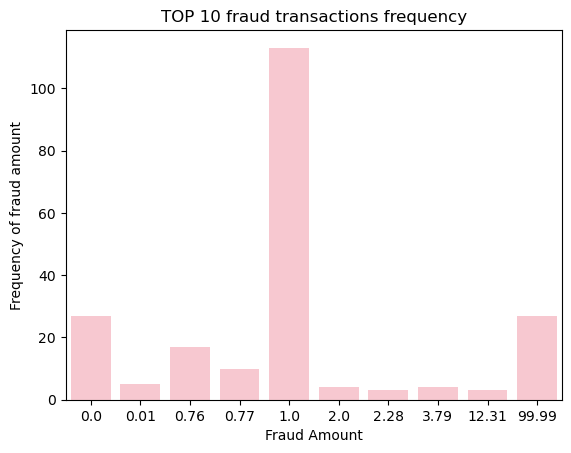

In [47]:
sns.barplot(x=topN_fraud_transactions.index, y=topN_fraud_transactions.values, color='pink')
plt.title("TOP 10 fraud transactions frequency")
plt.xlabel("Fraud Amount")
plt.ylabel("Frequency of fraud amount")

#most fraud transactions happen for amount- 1.0, 0.0, 99.99, 0.76

Text(0, 0.5, 'Frequency of Non fraud amount')

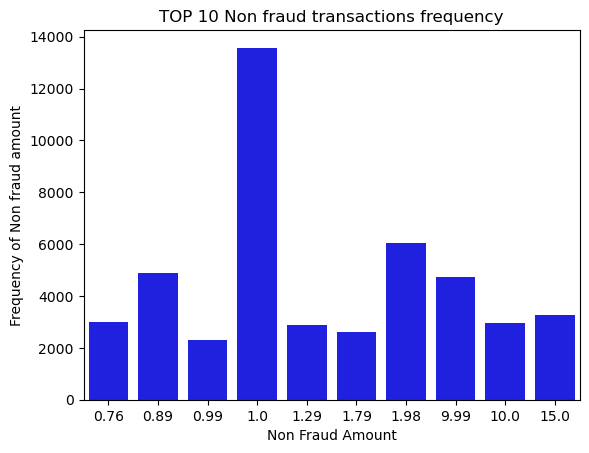

In [48]:
sns.barplot(x=topN_NoNfraud_transactions.index, y=topN_NoNfraud_transactions.values, color='blue')
plt.title("TOP 10 Non fraud transactions frequency")
plt.xlabel("Non Fraud Amount")
plt.ylabel("Frequency of Non fraud amount")

